# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from random import choice

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here

dice_roll=([random.randint(1,6) for x in range(10)])
dice_roll

[5, 4, 2, 6, 5, 1, 5, 3, 4, 3]

In [3]:
df = pd.DataFrame(dice_roll, columns =['Roll_value'])
df.index.names = ['count']
df['Roll_count'] = df.index + 1
df

,Roll_value,Roll_count
count,,
0,5,1
1,4,2
2,2,3
3,6,4
4,5,5
5,1,6
6,5,7
7,3,8
8,4,9


#### 2.- Plot the results sorted by value.

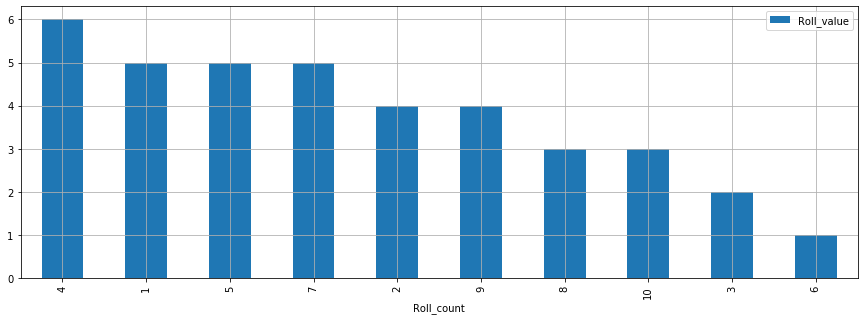

In [4]:
# your code here
df1=df.sort_values(['Roll_value'],ascending=False)
# Plot the results
df1.set_index('Roll_count').plot(figsize=(15,5), kind='bar', grid=True)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [5]:
# your code here

frequency = df['Roll_value'].value_counts()
frequency

5    3
4    2
3    2
6    1
2    1
1    1
Name: Roll_value, dtype: int64

In [6]:
freq = pd.DataFrame(frequency) 
freq.index.name='Roll_number'
freq

,Roll_value
Roll_number,
5,3
4,2
3,2
6,1
2,1
1,1


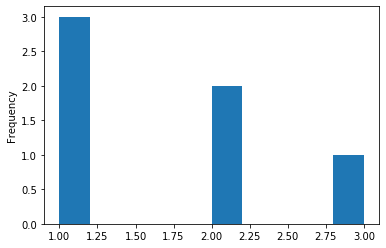

In [7]:
freq.stack().plot.hist()

In [8]:
#The 2 plots are telling the same story in different ways.
#The first one is showing the exact number rolled with each new roll, and it is visible that 3 numbers repeat themselves, while 3 numbers only roll once.
#The second plot says that 3 numbers are rolled once and 3 numbers are rolled multiple times (without having the visibility into which numbers exactly are rolled once or twice)

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
# your code here
def calculate_mean(df,col):
    mean=sum(df[col])/len(df[col])
    return mean
calculate_mean(df1,'Roll_value')

3.8

In [10]:
#to check
count=len(dice_roll)
sum(dice_roll)
mean=sum(dice_roll)/count
mean

3.8

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [11]:
# your code here
frequency = df['Roll_value'].value_counts().reset_index()
frequency.rename(columns = {'index': 'Roll_number'}, inplace = True)
frequency

,Roll_number,Roll_value
0,5,3
1,4,2
2,3,2
3,6,1
4,2,1
5,1,1


In [12]:
mean = np.sum(frequency['Roll_number'] * frequency['Roll_value'])/np.sum(frequency['Roll_value'])
mean

3.8

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [13]:
# your code here
def calculate_median (df, col):
    df=df.sort_values(col)
    mid=int((len(df[col]))/2)
    if len(df[col])%2==0:
        return(mid+(mid-1))/2
    else:
        return mid
calculate_median(frequency,'Roll_number')


2.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [14]:
# your code here
def quartiles (df, col):
    df = df.sort_values(col)
    Q1 = df.iloc[int(len(df[col])/4)][col]
    Q2 = calculate_median(df, col)
    Q3 = df.iloc[-int(len(df[col])/4)][col]
    return print([Q1, Q2, Q3])

quartiles(frequency, 'Roll_number')

[2, 2.5, 6]


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from [here](https://drive.google.com/file/d/1mDz-pl6Dpp0fvrXqkFTosuaW3mw6tfWP/view?usp=sharing), place it in the `data` folder and load it
#### 1.- Sort the values and plot them. What do you see?

In [15]:
# your code here
rolls100=pd.read_csv('../data/roll_the_dice_hundred.csv')

In [16]:
rolls100.groupby(by='value', axis=0).count()

,Unnamed: 0,roll
value,,
1,12,12
2,17,17
3,14,14
4,22,22
5,12,12
6,23,23


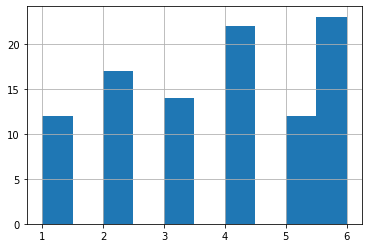

In [17]:
rolls100['value'].hist(bins=10)

In [18]:
"""
6 and 4 are the values that appear most frequently
"""

'\n6 and 4 are the values that appear most frequently\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [19]:
# your code here
calculate_mean(rolls100,'value')

3.74

#### 3.- Now, calculate the frequency distribution.


In [20]:
# your code here
frequency100 = rolls100['value'].value_counts().reset_index()
frequency100.rename(columns = {'index': 'Roll_number'}, inplace = True)
frequency100

,Roll_number,value
0,6,23
1,4,22
2,2,17
3,3,14
4,5,12
5,1,12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

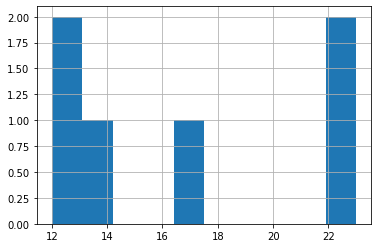

In [21]:
# your code here
frequency100['value'].hist(bins=10)

In [22]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5 Read the `roll_the_dice_thousand.csv` from <br> 
[here](https://drive.google.com/file/d/1zYzEcKL1tA69WCACG8WhTEr7m9fojClZ/view?usp=sharing), place it in the `data` folder and load it. 
Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [23]:
# your code here
rolls1k=pd.read_csv('../data/roll_the_dice_thousand.csv')
rolls1k.head(5)

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


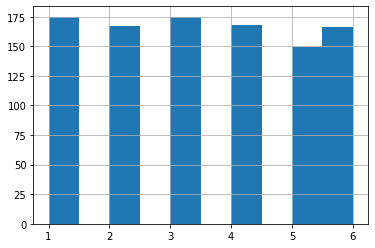

In [24]:
rolls1k['value'].hist(bins=10)

In [25]:
"""
the values have equalized, with all 6 numbers appear in almost the same proportion
"""

'\nthe values have equalized, with all 6 numbers appear in almost the same proportion\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`

from [here](https://drive.google.com/file/d/1sHr5-fnvn9oBvxu3tlR4ANCnQHDV-bUc/view?usp=sharing), place it in the data folder and load it. <br>
Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [26]:
# your code here
ages=pd.read_csv('../data/ages_population.csv')
ages.head(5)

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


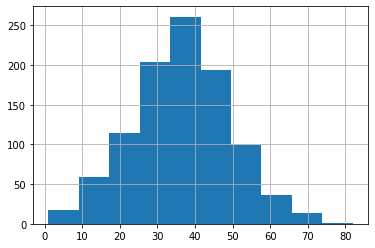

In [27]:
ages['observation'].hist(bins=10) #the mean is around 35

Text(40.21600000000001, 130.41, 'Mean: 36.56')

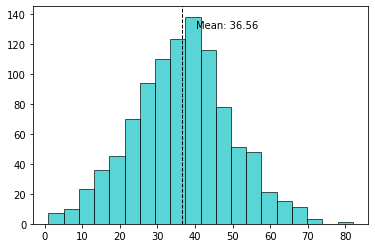

In [28]:
#with this one we can see exactly the mean line and the value of 36.56
x = ages['observation']
result = plt.hist(x, bins=20, color='c', edgecolor='k', alpha=0.65)
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [29]:
# your code here
ages.mean()

observation    36.56
dtype: float64

In [30]:
ages.std(axis=0)

observation    12.8165
dtype: float64

In [31]:
"""
your comments here
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` 
from [here](https://drive.google.com/file/d/1RWGflLnwLOgZICUnrc9COzj3qcUeJP0X/view?usp=sharing) place it in the data folder and load it.  Calculate the frequency distribution and plot it.

In [32]:
# your code here
ages2=pd.read_csv('../data/ages_population2.csv')
ages2.head(5)

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


Text(29.870500000000003, 131.355, 'Mean: 27.16')

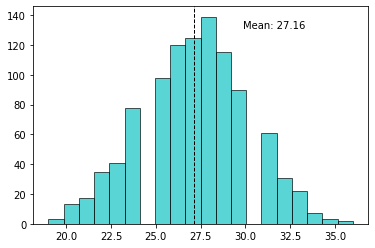

In [33]:
x = ages2['observation']
result = plt.hist(x, bins=20, color='c', edgecolor='k', alpha=0.65)
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [34]:
"""
Mean is lower compared to the previous set, because the set is only containing ages between 20 and 35
"""

'\nMean is lower compared to the previous set, because the set is only containing ages between 20 and 35\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [35]:
# your code here
ages2.mean()

observation    27.155
dtype: float64

In [36]:
ages2.std(axis=0)

observation    2.969814
dtype: float64

In [37]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv` 
from [here](https://drive.google.com/file/d/1knUGLeVUADYUXYqq_Ap48oTtLKkjHCNv/view?usp=sharing) and place it in the data folder. Calculate the frequency distribution and plot it.

In [38]:
# your code here
ages3=pd.read_csv('../data/ages_population3.csv')
ages3.head(5)

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [39]:
# your code here
ages3.mean()

observation    41.989
dtype: float64

In [40]:
ages3.std(axis=0)

observation    16.144706
dtype: float64

Text(46.1879, 99.22500000000001, 'Mean: 41.99')

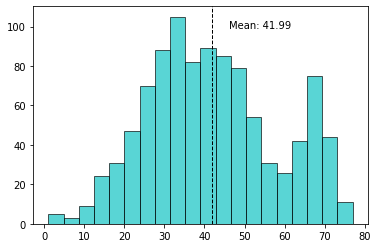

In [41]:
x = ages3['observation']
result = plt.hist(x, bins=20, color='c', edgecolor='k', alpha=0.65)
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))

In [42]:
"""
There are mnore values of higher ages which is increasing the mean
"""

'\nThere are mnore values of higher ages which is increasing the mean\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [43]:
# your code here
Q1=(ages3['observation'].quantile(0.25))
Q1


30.0

In [44]:
Q2=(ages3['observation'].quantile(0.50))
Q2

40.0

In [45]:
Q3=(ages3['observation'].quantile(0.75))
Q3

53.0

In [46]:
"""
The higher values are increasing the Q2 and Q3 showing a distribution skewed to the right
"""

'\nThe higher values are increasing the Q2 and Q3 showing a distribution skewed to the right\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [47]:
# your code here
Q4=(ages3['observation'].quantile(0.60))
Q4

45.0

In [48]:
"""
your comments here
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [49]:
# your code here

In [50]:
"""
your comments here
"""

'\nyour comments here\n'